<div class="alert alert-block alert-info">
    <img src="https://www.uerj.br/wp-content/uploads/2019/07/logo-70anos-site.svg" alt="Trulli" width="220" align="left">
    <center style="width: 80%;">
        <div> <b>Author:</b> Cleiton Magalhães Freitas</div>
        <div> <b>Department:</b> Electrical Engineering Department</div>
        <div> <b>University:</b> Rio de Janeiro State University</div>
        <div> <b>Email:</b> cleiton.freitas@uerj.br</div>
        <div> <b>Date:</b> August 11, 2020</div>
        <div style="display: table;">
            <div style="width: 17%; display: table-cell;">
                <a href="https://orcid.org/0000-0002-6300-0521">
                    <img width='22'  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/Orcid25x25.svg" />
                </a>
            </div>
            <div style="width: 17%; display: table-cell;">
                <a href="https://www.researchgate.net/profile/Cleiton_Freitas">
                    <img  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/ResearchGate25x25.svg" width='22'/>
                </a>
            </div>                 
            <div style="width: 17%; display: table-cell;">
                <a href="https://www.mendeley.com/profiles/cleiton-freitas3/">
                    <img  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/Mendeley25x25.svg" width='22'/>
                </a>
            </div>
            <div style="width: 17%; display: table-cell;">
                <a href="https://scholar.google.com.br/citations?user=Nq_YDvIAAAAJ&hl=pt-BR&oi=ao">
                    <img  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/GoogleScholar25x25.svg" width='22'/>
                </a>
            </div>     
            <div style="width: 17%; display: table-cell;">
                <a href="https://publons.com/researcher/1561461/cleiton-magalhaes-freitas/">
                    <img  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/Publons25x25.svg" width='22'/>
                </a>
            </div> 
            </div>     
            <div style="width: 17%; display: table-cell;">
                <a href="http://lattes.cnpq.br/8580465355265899">
                    <img  src="https://raw.githubusercontent.com/cleitoncmf/cleitoncmf/9520a795b3aac14dceb39e4e3652bf4eff38dbd3/Images/Lattes25x25.svg" width='22'/>
                </a>
            </div>                     
        </div>
    </center>
</div>

# Initial analysis of the current controlled MMC

This notebook was created for presenting some initial analysis of the NRF current-controlled MMC. Differently from the thesis, it is intend here to consider the dynamics of the PLL.

In [1]:
%matplotlib inline

import sympy as sp
import control as ctrl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# My modules 
from MMC import MMC
from LINEARCTRL import LINEARCTRL
from MMC_CTRL_NRF_I import MMC_CTRL_NRF_I
from bodeFromDataFrame import bodeFromDataFrame


In [2]:
# Definition of the Laplace-domain frequency
s = ctrl.tf('s')
#s = sp.Symbol('s')

# Definition of the MMC with the same parameters considered in the Thesis
mmc_0 = MMC(s = s)

# Definition of the current cotroller used in the thesis
Ci_0 = LINEARCTRL(type='PR',kp=0.0001, kr=0.01,d=0,w0=2*np.pi*60,s=s)

# MMC model without considering the PLL (used in the thesis)
mmc_ctrl_i_0 = MMC_CTRL_NRF_I(Ci = Ci_0, s = s, Converter=mmc_0)

In [3]:
# different controllers 

Ci_10 = LINEARCTRL(type='PR',kp=0.001, kr=0.01,d=0,w0=2*np.pi*60,s=s)
Ci_20 = LINEARCTRL(type='PR',kp=0.01, kr=0.01,d=0,w0=2*np.pi*60,s=s)


# Models for the different control settings
mmc_ctrl_i_10 = MMC_CTRL_NRF_I(Ci = Ci_10, s = s, Converter=mmc_0)
mmc_ctrl_i_20 = MMC_CTRL_NRF_I(Ci = Ci_20, s = s, Converter=mmc_0)


(<Figure size 1080x504 with 2 Axes>,
 array([<AxesSubplot:ylabel='Magnitude - dB'>,
        <AxesSubplot:xlabel='Frequency - Hz', ylabel='Phase - deg'>],
       dtype=object))

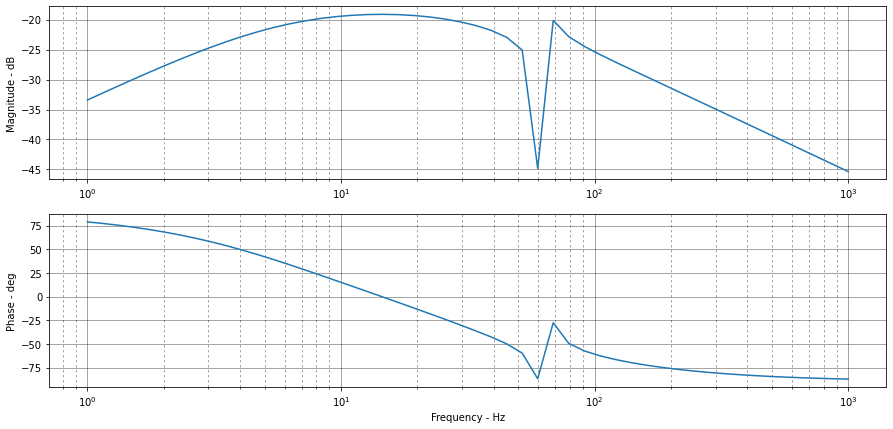

In [4]:
# %pylab
# %matplotlib nbagg
# %matplotlib inline
# %matplotlib notebook

import mplcursors
from DataFrameFromRF import DataFrameFromRF
from bodeFromDataFrame import bodeFromDataFrame

teste = DataFrameFromRF(G =mmc_ctrl_i_0.Yac, s = s)
teste.head()

bodeFromDataFrame([teste])
